# TASK #2: IMPORT LIBRARIES/DATASETS

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [4]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train= train['features'], train['labels']
X_validation, y_validation= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

In [6]:
X_train.shape
X_validation.shape
X_test.shape

(12630, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
# TASK #3: PERFORM IMAGES VISUALIZATION

In [9]:
X_train.shape
X_validation.shape
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_validation.shape

(4410,)

# TASK #3: PERFORM IMAGES VISUALIZATION

25

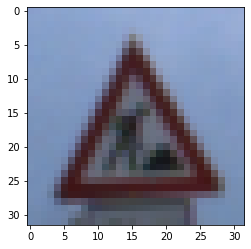

In [11]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

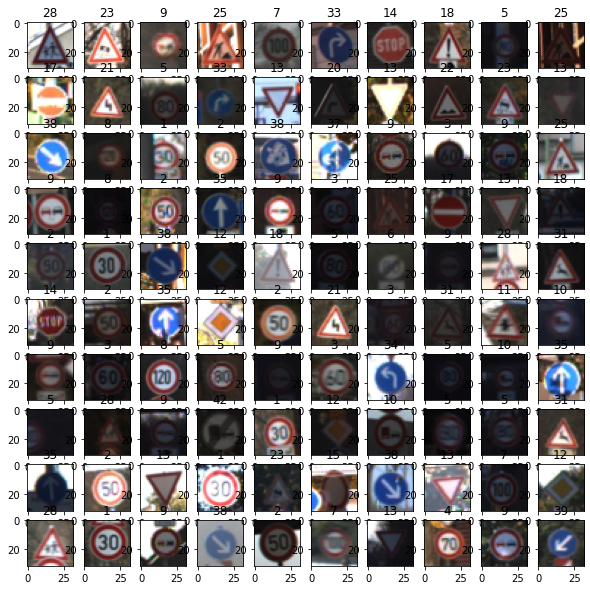

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train_gray = np.sum(X_train/3, axis = 3  ,keepdims= True)
X_test_gray = np.sum(X_test/3, axis = 3  ,keepdims= True)
X_valid_gray = np.sum(X_validation/3, axis = 3  ,keepdims= True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

In [17]:
X_train_gray_norm

array([[[[-0.578125  ],
         [-0.4609375 ],
         [-0.125     ],
         ...,
         [-0.265625  ],
         [-0.36458333],
         [-0.35416667]],

        [[-0.5       ],
         [-0.02864583],
         [ 0.53125   ],
         ...,
         [-0.23177083],
         [-0.3203125 ],
         [-0.296875  ]],

        [[-0.4453125 ],
         [ 0.12239583],
         [ 0.57552083],
         ...,
         [-0.30989583],
         [-0.36979167],
         [-0.34375   ]],

        ...,

        [[-0.640625  ],
         [-0.49479167],
         [-0.19270833],
         ...,
         [-0.48177083],
         [-0.43229167],
         [-0.3984375 ]],

        [[-0.6640625 ],
         [-0.60416667],
         [-0.40885417],
         ...,
         [-0.44270833],
         [-0.52083333],
         [-0.48697917]],

        [[-0.64322917],
         [-0.63541667],
         [-0.47135417],
         ...,
         [-0.36197917],
         [-0.49479167],
         [-0.46875   ]]],


       [[[-0.7421875 ],


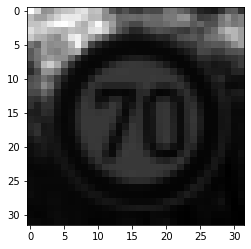

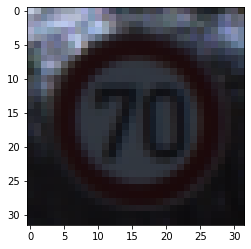

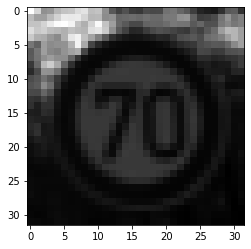

In [18]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

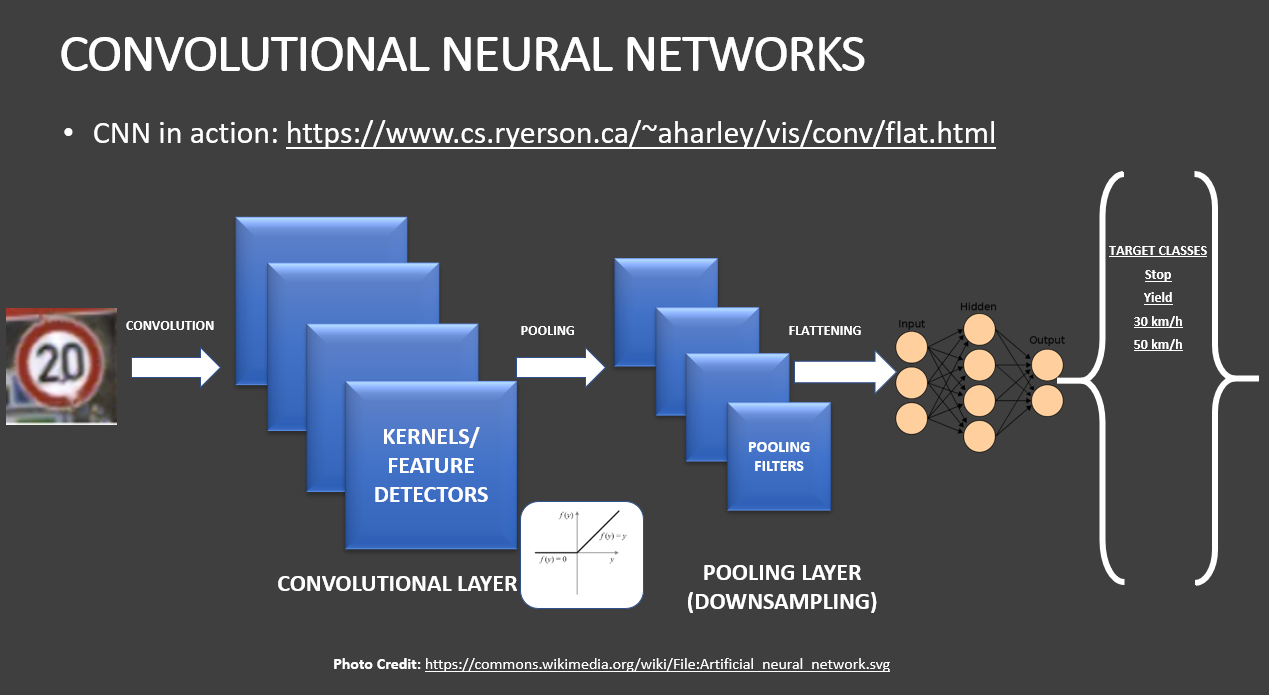

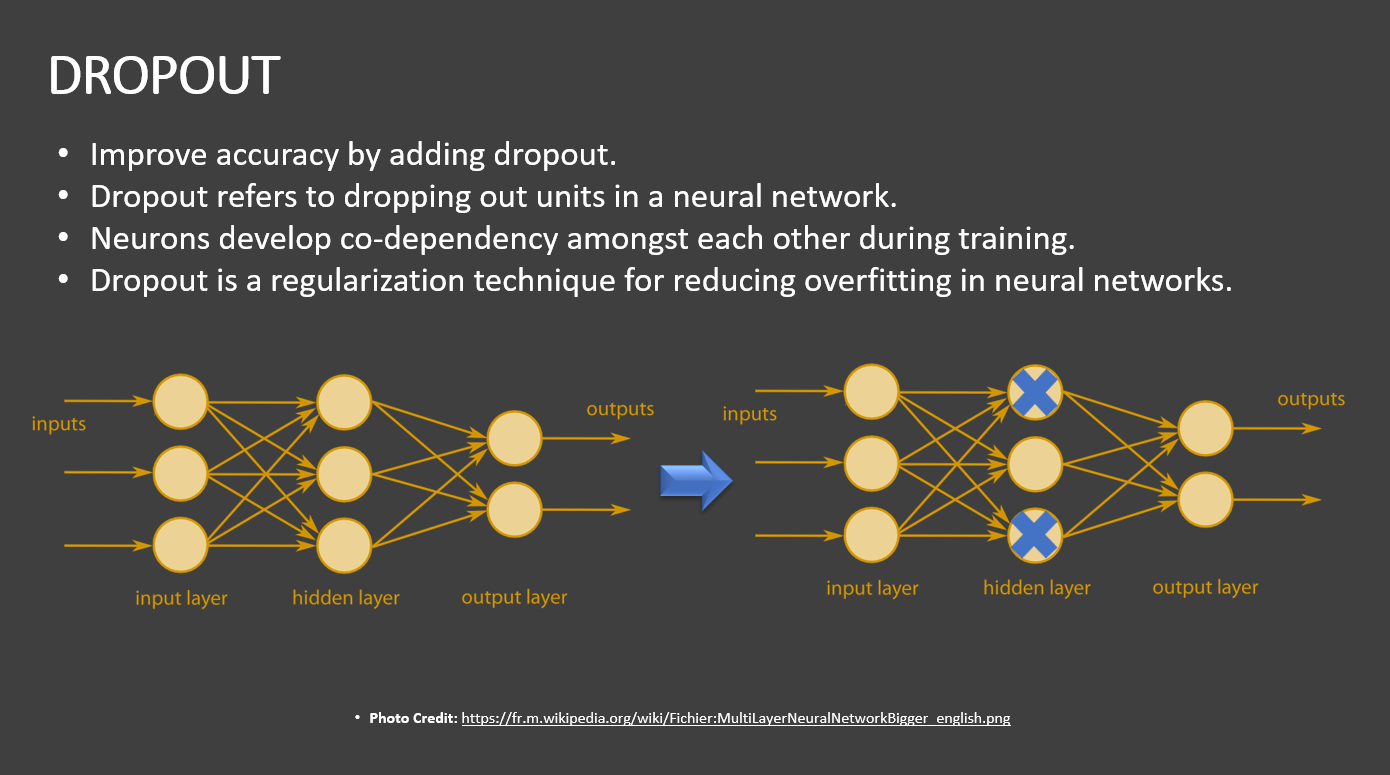

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [19]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [23]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_valid_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 5s 72ms/step - loss: 0.4305 - accuracy: 0.8861 - val_loss: 0.7007 - val_accuracy: 0.7973
Epoch 2/50
70/70 [==============================] - 6s 87ms/step - loss: 0.3737 - accuracy: 0.9016 - val_loss: 0.6427 - val_accuracy: 0.8054
Epoch 3/50
70/70 [==============================] - 6s 92ms/step - loss: 0.3238 - accuracy: 0.9174 - val_loss: 0.6271 - val_accuracy: 0.8184
Epoch 4/50
70/70 [==============================] - 6s 89ms/step - loss: 0.2811 - accuracy: 0.9280 - val_loss: 0.5825 - val_accuracy: 0.8324
Epoch 5/50
70/70 [==============================] - 7s 99ms/step - loss: 0.2546 - accuracy: 0.9339 - val_loss: 0.5883 - val_accuracy: 0.8420
Epoch 6/50
70/70 [==============================] - 7s 102ms/step - loss: 0.2256 - accuracy: 0.9431 - val_loss: 0.5651 - val_accuracy: 0.8503
Epoch 7/50
70/70 [==============================] - 7s 101ms/step - loss: 0.2013 - accuracy: 0.9495 - val_loss: 0.5392 - val_accuracy: 0.8608
Epoch 8/50


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

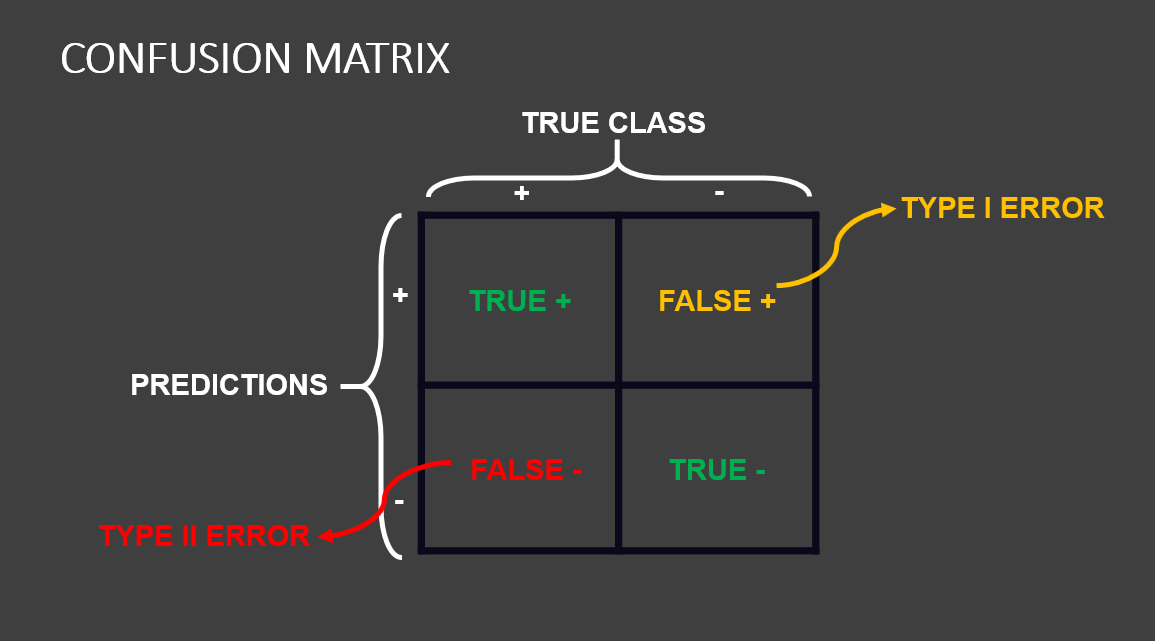

In [28]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.3605 - accuracy: 0.8686
Test Accuracy: 0.8686460852622986


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

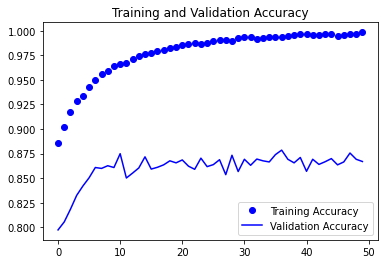

In [31]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

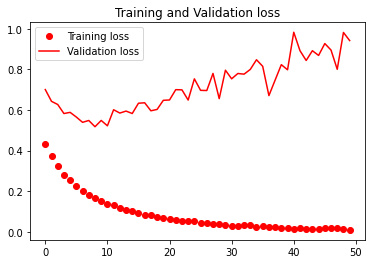

In [32]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

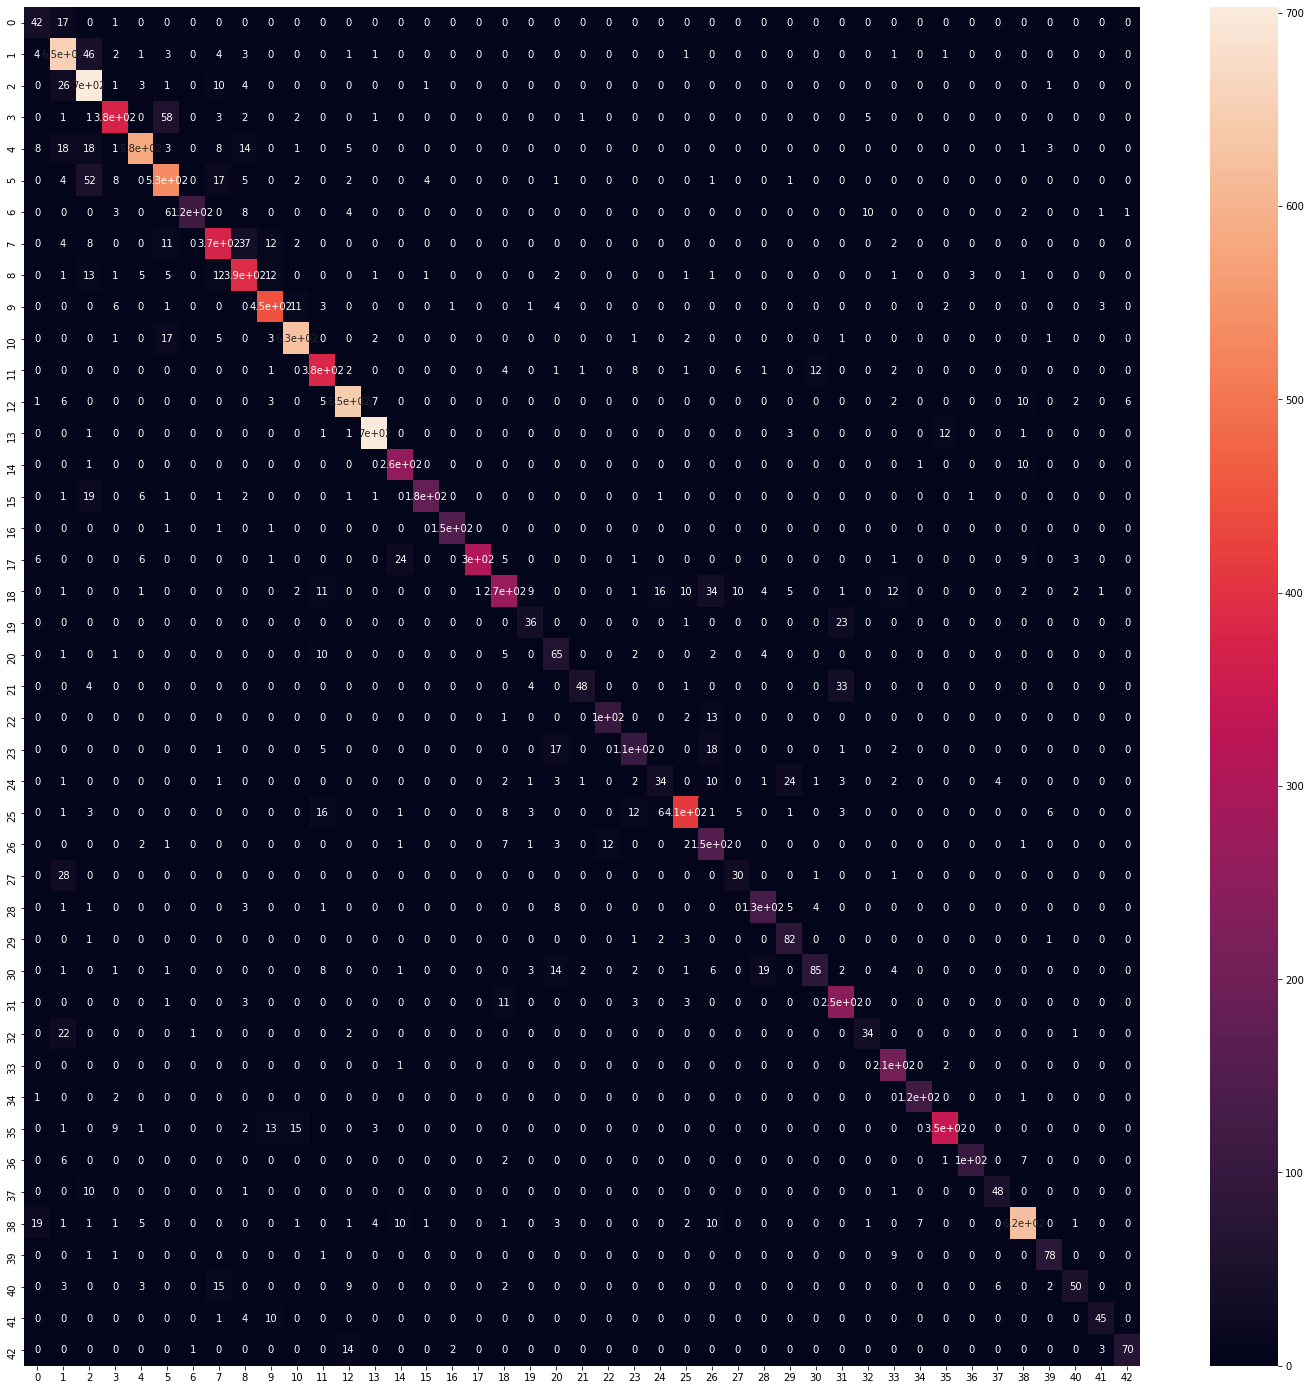

In [33]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

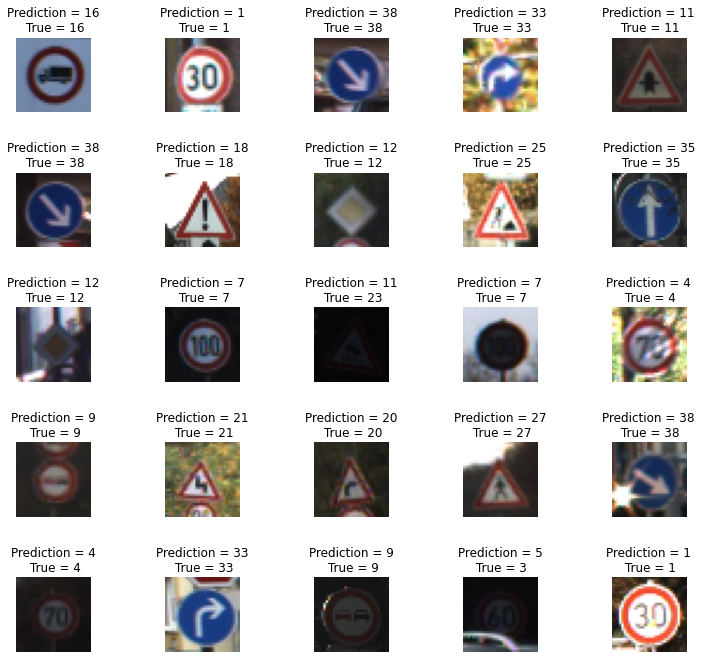

In [34]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

# APPENDIX

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }